# Import

In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Einlesen aller HDF5-Files

## ZAMG

In [2]:
zamg = pd.read_hdf('../data/zamg/zamg.h5') 
zamg["date"] = pd.to_datetime(zamg["date"])
print(zamg.dtypes)
print(zamg)

location            object
date        datetime64[ns]
rain               float64
deg                float64
dtype: object
    location       date  rain   deg
0    Güssing 2022-05-23   0.0  19.6
1    Güssing 2022-05-24  15.1  19.7
2    Güssing 2022-05-25  16.5  17.6
3    Güssing 2022-05-26   0.0  18.1
4    Güssing 2022-05-27  12.0  20.1
..       ...        ...   ...   ...
95  Poysdorf 2022-06-11   0.0  20.4
96  Poysdorf 2022-06-12   0.0  21.2
97  Poysdorf 2022-06-13   0.1  18.4
98  Poysdorf 2022-06-14   0.0  17.2
99  Poysdorf 2022-06-15   0.0  17.9

[100 rows x 4 columns]


## ECAD

### Files laden

In [2]:
ecadRR = pd.read_hdf('../data/ecad/RR.h5') 
ecadRR["DATE"] = pd.to_datetime(ecadRR["DATE"], format='%Y%m%d')

# add station name
ecadRR.loc[ecadRR["SOUID"] == 234717 , "name"] = "KREMS"
ecadRR.loc[ecadRR["SOUID"] == 234938 , "name"] = "NEUSIEDL AM SEE"
ecadRR.loc[ecadRR["SOUID"] == 235003 , "name"] = "POYSDORF"
ecadRR.loc[ecadRR["SOUID"] == 236251 , "name"] = "GÜSSING"

print(ecadRR.dtypes)
print(ecadRR)

ecadTG = pd.read_hdf('../data/ecad/TG.h5') 
ecadTG["DATE"] = pd.to_datetime(ecadTG["DATE"], format='%Y%m%d')

# add station name
ecadTG.loc[ecadTG["SOUID"] == 234722 , "name"] = "KREMS"
ecadTG.loc[ecadTG["SOUID"] == 234943 , "name"] = "NEUSIEDL AM SEE"
ecadTG.loc[ecadTG["SOUID"] == 235008 , "name"] = "POYSDORF"
ecadTG.loc[ecadTG["SOUID"] == 236256 , "name"] = "GÜSSING"

print(ecadTG.dtypes)
print(ecadTG)

SOUID             int64
DATE     datetime64[ns]
RR                int64
name             object
dtype: object
        SOUID       DATE  RR     name
0      234717 1936-01-02   1    KREMS
1      234717 1936-01-03   3    KREMS
2      234717 1936-01-04  44    KREMS
3      234717 1936-01-05  11    KREMS
4      234717 1936-01-06   0    KREMS
...       ...        ...  ..      ...
99910  236251 2021-12-27   0  GÜSSING
99911  236251 2021-12-28  41  GÜSSING
99912  236251 2021-12-29   6  GÜSSING
99913  236251 2021-12-30   1  GÜSSING
99914  236251 2021-12-31   0  GÜSSING

[99915 rows x 4 columns]
SOUID             int64
DATE     datetime64[ns]
TG              float64
name             object
dtype: object
        SOUID       DATE   TG     name
0      234722 1936-01-01  3.8    KREMS
1      234722 1936-01-02  3.3    KREMS
2      234722 1936-01-03  3.4    KREMS
3      234722 1936-01-04  5.1    KREMS
4      234722 1936-01-05  3.6    KREMS
...       ...        ...  ...      ...
98455  236256 2021-12-27 

### Zusammenführen der Objekte ecadTG und ecadRR

In [7]:
# beide Schlüssel (name, DATE) in eine Tabelle
ecad = pd.concat([ecadRR[['name','DATE']], ecadTG[['name','DATE']]])
print(ecad.shape)
# eindeutige Werte für den Schlüssel (name, DATE)
ecad = ecad.groupby(by = ['name', 'DATE']).size().reset_index().rename(columns={0:'count'})[['name','DATE']]
print(ecad.shape)

# hinzufügen von RR und TG Werten
ecad = pd.merge(ecad, ecadRR[['name','DATE','RR']], how = 'left', on = ['name', 'DATE'])
ecad = pd.merge(ecad, ecadTG[['name','DATE','TG']], how = 'left', on = ['name', 'DATE'])
ecad

(198375, 2)
(99958, 2)


,name,DATE,RR,TG
0,GÜSSING,1948-01-01,0.0,-6.6
1,GÜSSING,1948-01-02,0.0,-4.8
2,GÜSSING,1948-01-03,0.0,-1.5
3,GÜSSING,1948-01-04,0.0,3.5
4,GÜSSING,1948-01-05,0.0,0.6
...,...,...,...,...
99953,POYSDORF,2021-12-27,0.0,-1.0
99954,POYSDORF,2021-12-28,52.0,-0.5
99955,POYSDORF,2021-12-29,19.0,1.4
99956,POYSDORF,2021-12-30,14.0,4.7


## GeDaBa

In [5]:
bl = pd.read_hdf('../data/agrar/burgenland.h5') 
noe = pd.read_hdf('../data/agrar/noe.h5') 
gedaba = pd.concat([bl, noe])
gedaba = gedaba.astype({"jahr": int, "gkz5": int})
print(gedaba.dtypes)
print(gedaba)

gkz5              int64
gemeindename     object
jahr              int64
merkmal          object
wert            float64
dtype: object
        gkz5             gemeindename  jahr     merkmal        wert
0      10101               Eisenstadt  2000  Weingärten  487.330000
1      10101               Eisenstadt  2000      Weizen  235.310000
2      10101               Eisenstadt  2001  Weingärten  474.840000
3      10101               Eisenstadt  2001      Weizen  246.510000
4      10101               Eisenstadt  2002  Weingärten  507.810000
...      ...                      ...   ...         ...         ...
14154  32530  Zwettl-Niederösterreich  2017      Weizen  431.599976
14155  32530  Zwettl-Niederösterreich  2018      Weizen  458.019989
14156  32530  Zwettl-Niederösterreich  2019      Weizen  449.880005
14157  32530  Zwettl-Niederösterreich  2020      Weizen  441.269989
14158  32530  Zwettl-Niederösterreich  2021      Weizen  617.090027

[19334 rows x 5 columns]


### Filtern der betrachteten Gemeinden

In [6]:
gem = pd.read_csv('../data/agrar/gemNearby.csv') 
gedaba = gedaba[gedaba.gkz5.isin(gem.id)]
print(gedaba.shape)
gedaba

(1319, 5)


,gkz5,gemeindename,jahr,merkmal,wert
939,10404,Gerersdorf-Sulz,2000,Weingärten,0.310000
940,10404,Gerersdorf-Sulz,2000,Weizen,128.330000
941,10404,Gerersdorf-Sulz,2001,Weingärten,0.300000
942,10404,Gerersdorf-Sulz,2001,Weizen,153.030000
943,10404,Gerersdorf-Sulz,2002,Weingärten,0.300000
...,...,...,...,...,...
9915,31654,Wilfersdorf,2019,Weizen,2024.929932
9916,31654,Wilfersdorf,2020,Weingärten,85.160004
9917,31654,Wilfersdorf,2020,Weizen,2007.069946
9918,31654,Wilfersdorf,2021,Weingärten,84.779999


# Basis-Visualisierung für alle Datensätze

## ZAMG Visualisierung

<AxesSubplot:xlabel='date', ylabel='deg'>

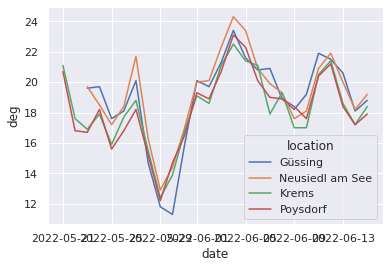

In [7]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=zamg, x="date", y="deg", hue="location")

<AxesSubplot:xlabel='date', ylabel='rain'>

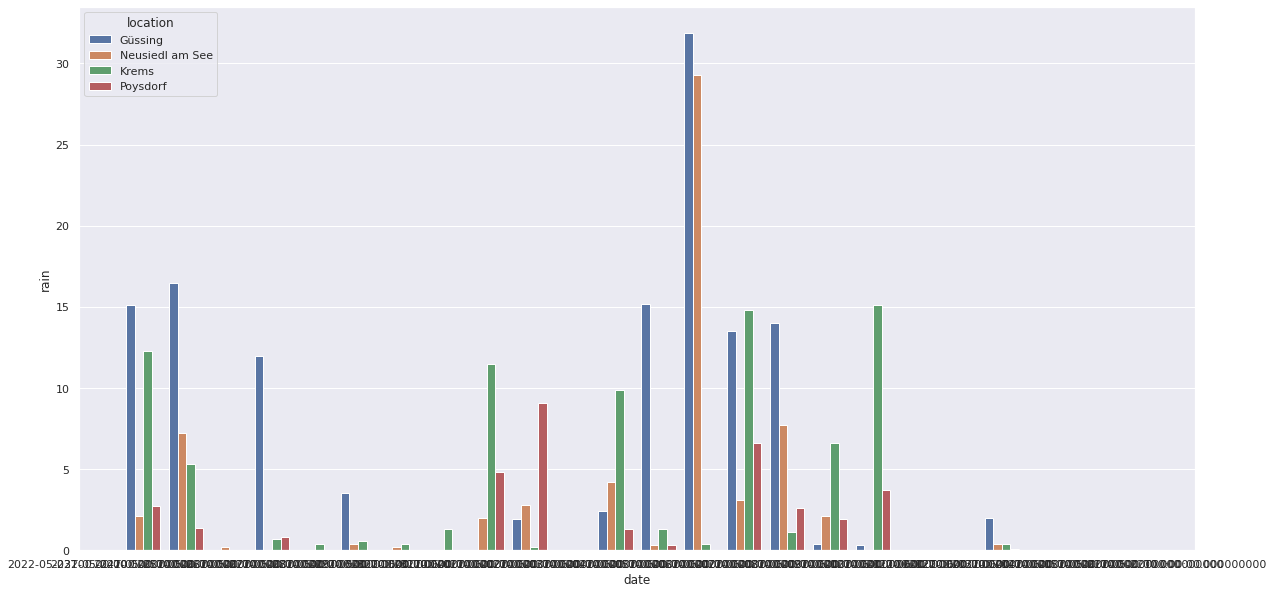

In [8]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=zamg, x="date", y="rain", hue="location")

## ECAD Visualisierung

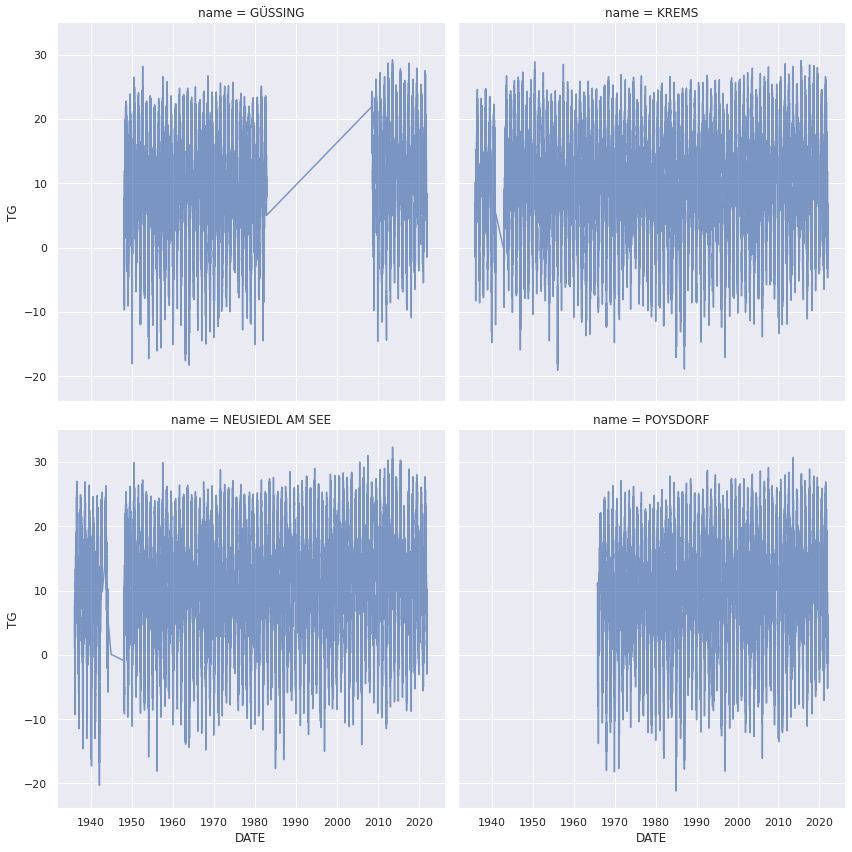

In [9]:
g = sns.FacetGrid(ecad, col="name", col_wrap=2, height=6)
g.map(sns.lineplot, "DATE", "TG", alpha=.7)

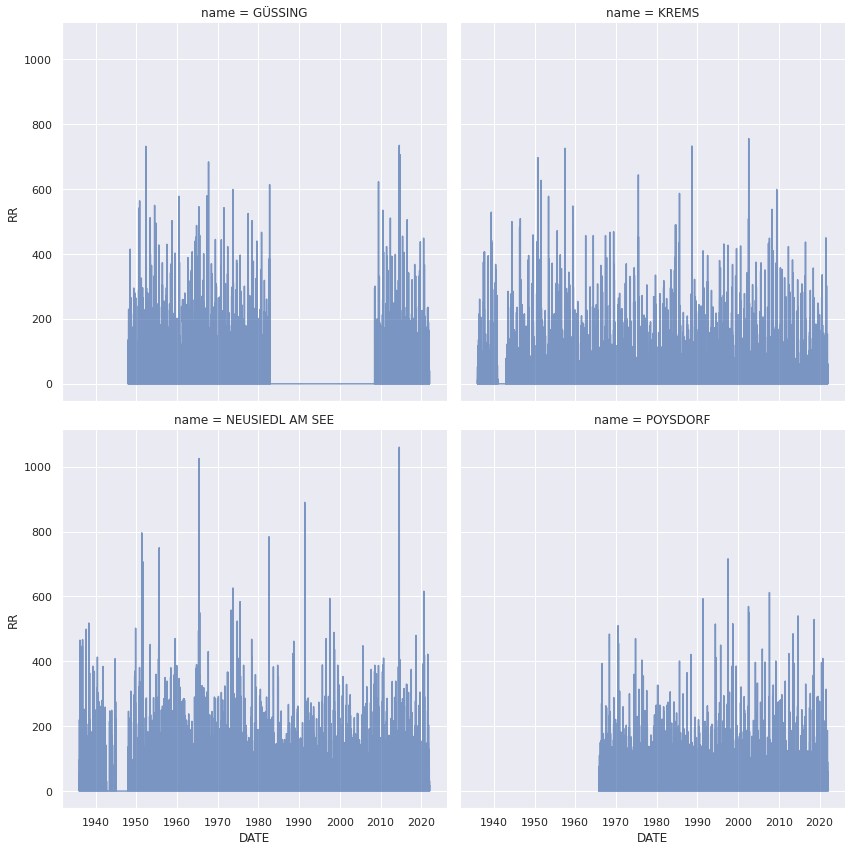

In [10]:
g = sns.FacetGrid(ecad, col="name", col_wrap=2, height=6)
g.map(sns.lineplot, "DATE", "RR", alpha=.7)

## GeDaBa Visualisierung

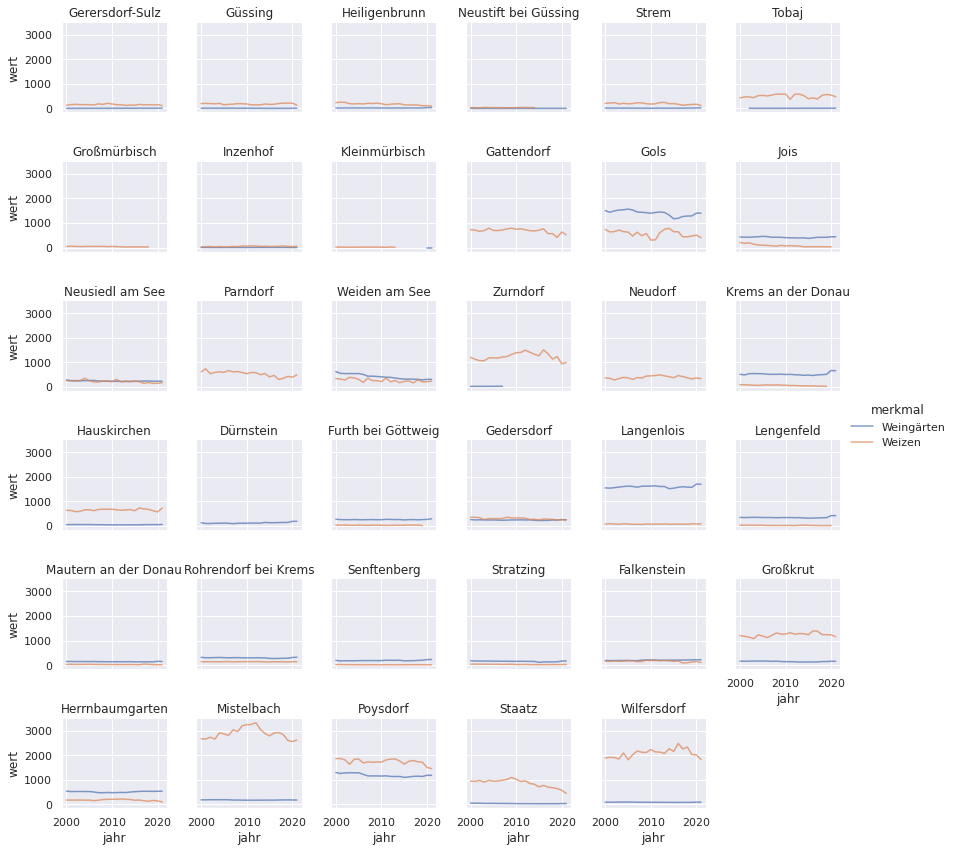

In [11]:
g = sns.FacetGrid(gedaba, col="gemeindename", hue='merkmal', col_wrap=6, height=2) # gemeindename
g.map(sns.lineplot, "jahr", "wert", alpha=.7)
g.set_titles(col_template = '{col_name}')
g.add_legend()

# ZAMG-Vergleich mit ECAD Temperatur-Daten und Regen

In [8]:
# extra spalte für jahre der ecad-daten
ecad['year'] = pd.DatetimeIndex(ecad['DATE']).year

# ersetzen von jahr im datum mit zamg-jahr (2020 - wegen schaltjahr)
ecad['plotdate'] = pd.to_datetime('2020-' + ecad.DATE.dt.strftime('%m') + "-" + ecad.DATE.dt.strftime('%d'))

# ecad nur für datumsbereich von zamg
#zamg.date.min() # 2022-05-21
#zamg.date.max() # 2022-06-15

ecad = ecad.set_index(['plotdate'])
ecadSimple = ecad.loc['2020-5-21':'2020-6-15']
print(ecadSimple)

# 2 jahre hinzufügen zu plotdate

                name       DATE    RR    TG  year
plotdate                                         
2020-05-21   GÜSSING 1948-05-21   0.0  11.4  1948
2020-05-22   GÜSSING 1948-05-22   0.0  13.0  1948
2020-05-23   GÜSSING 1948-05-23   0.0  14.0  1948
2020-05-24   GÜSSING 1948-05-24   0.0  14.7  1948
2020-05-25   GÜSSING 1948-05-25   0.0  14.9  1948
...              ...        ...   ...   ...   ...
2020-06-11  POYSDORF 2021-06-11   9.0  19.8  2021
2020-06-12  POYSDORF 2021-06-12  12.0  21.4  2021
2020-06-13  POYSDORF 2021-06-13   0.0  18.2  2021
2020-06-14  POYSDORF 2021-06-14   0.0  16.3  2021
2020-06-15  POYSDORF 2021-06-15   0.0  17.6  2021

[7098 rows x 5 columns]


In [9]:
ecadSimple = ecadSimple.reset_index()
ecadSimple['plotdate'] = ecadSimple['plotdate'] + pd.DateOffset(years=2)
print(ecadSimple)

       plotdate      name       DATE    RR    TG  year
0    2022-05-21   GÜSSING 1948-05-21   0.0  11.4  1948
1    2022-05-22   GÜSSING 1948-05-22   0.0  13.0  1948
2    2022-05-23   GÜSSING 1948-05-23   0.0  14.0  1948
3    2022-05-24   GÜSSING 1948-05-24   0.0  14.7  1948
4    2022-05-25   GÜSSING 1948-05-25   0.0  14.9  1948
...         ...       ...        ...   ...   ...   ...
7093 2022-06-11  POYSDORF 2021-06-11   9.0  19.8  2021
7094 2022-06-12  POYSDORF 2021-06-12  12.0  21.4  2021
7095 2022-06-13  POYSDORF 2021-06-13   0.0  18.2  2021
7096 2022-06-14  POYSDORF 2021-06-14   0.0  16.3  2021
7097 2022-06-15  POYSDORF 2021-06-15   0.0  17.6  2021

[7098 rows x 6 columns]


In [22]:
ecadSimple['year'].nunique()

86

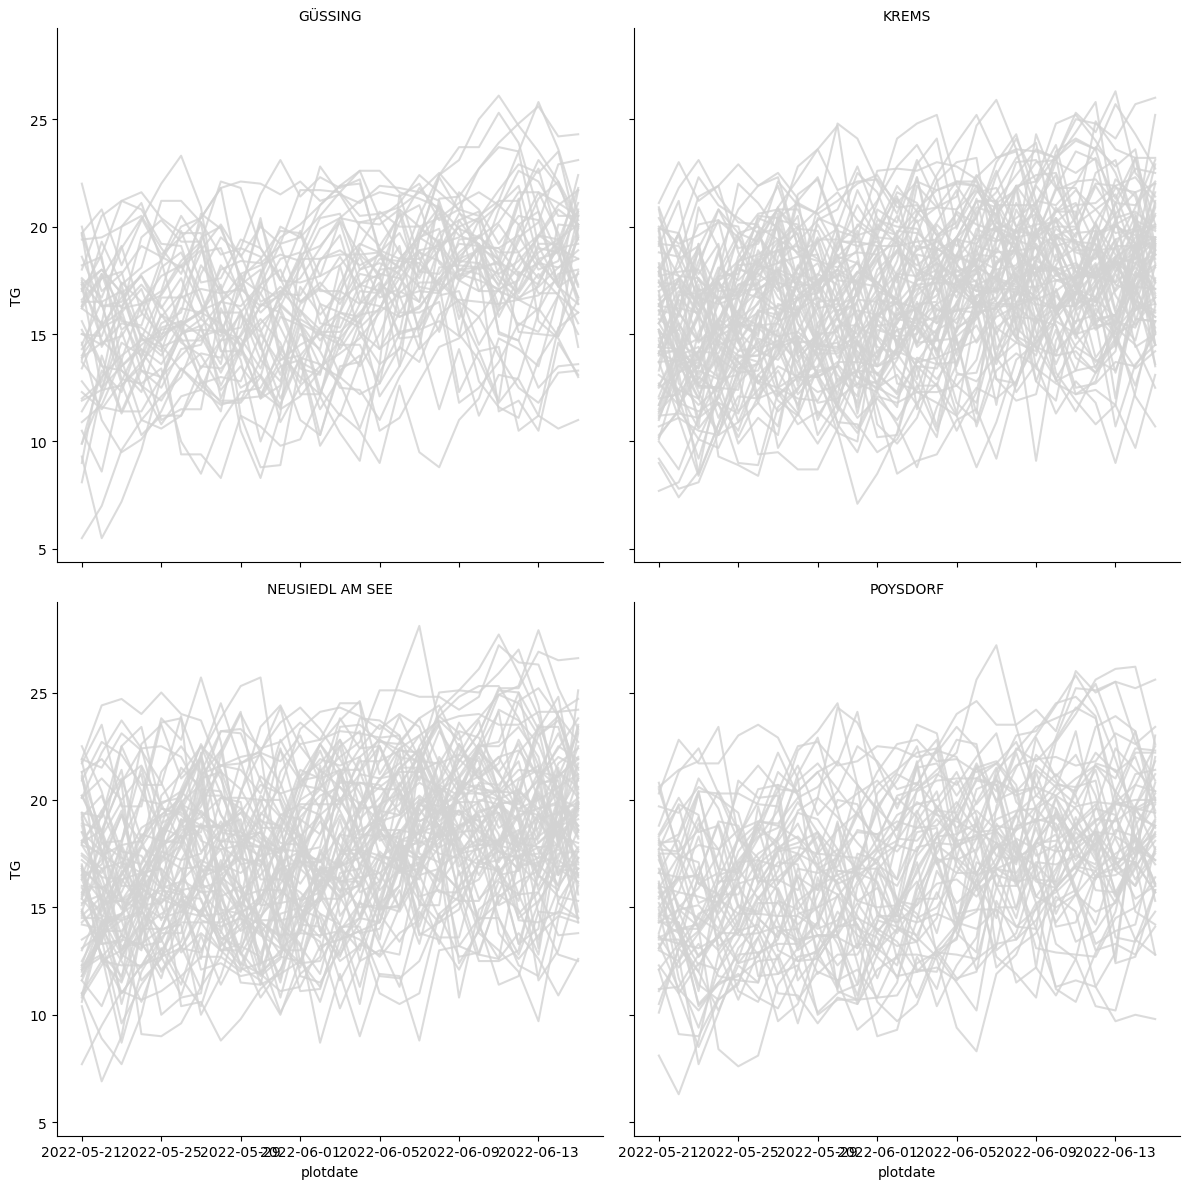

In [25]:
d = {'color': ['lightgray'] * ecadSimple['year'].nunique()}
g = sns.FacetGrid(ecadSimple, col="name", hue='year', hue_kws=d, col_wrap=2, height=6) # gemeindename
g.map(sns.lineplot, "plotdate", "TG", alpha=.8)
g.set_titles(col_template = '{col_name}')
#g.add_legend()

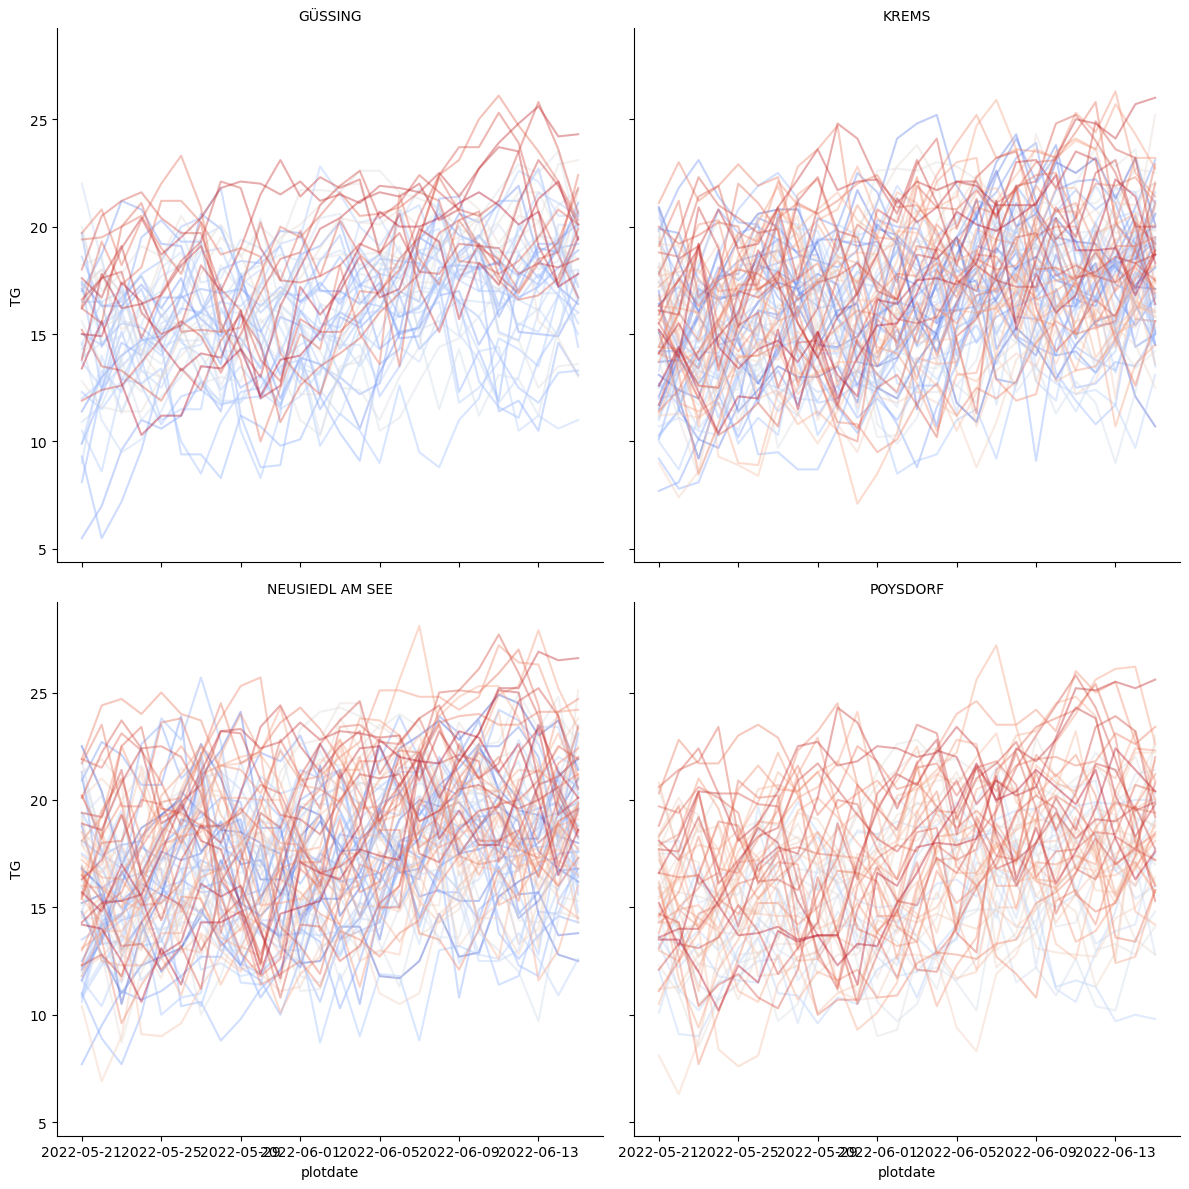

In [33]:
# paletten: coolwarm, light:#5A9
g = sns.FacetGrid(ecadSimple, col="name", hue='year', palette="coolwarm", col_wrap=2, height=6)
g.map(sns.lineplot, "plotdate", "TG", alpha=.4)
g.set_titles(col_template = '{col_name}')
#g.add_legend()

# GeDaBa-Daten als Summe der ausgewählte Gemeinden und ECAD-Daten beschreiben